In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [59]:
df = pd.read_csv('churn.csv', skipinitialspace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#check how many categories for each columns
for x in df.columns:
    print(x, len(df[x].unique()))

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [61]:
# selecting feature
# based on Information Theory, i exclude 
exclude = ['RowNumber', 'CustomerId', 'Surname']
for column in df.columns:
    for exc in exclude:
        if exc == column:
            print(exc, '=', column, '-> deleting...')
            df.drop([column], axis=1, inplace=True)
        else:
            continue
df

RowNumber = RowNumber -> deleting...
CustomerId = CustomerId -> deleting...
Surname = Surname -> deleting...


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
# since sklearn can only process cateoprical integer
# let's get dummies
df = pd.get_dummies(data= df, columns=['Gender', 'Geography'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [63]:
df.rename(columns={'Gender_Female':'Female', 'Gender_Male':'Male',
                   'Geography_France':'France', 'Geography_Germany':'Germany',
                  'Geography_Spain':'Spain'}, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Female           10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
 11  France           10000 non-null  uint8  
 12  Germany          10000 non-null  uint8  
 13  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.0 KB


In [65]:
#DecTree can handle missing value & robust to outlier
#df.isnull().sum()

In [66]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Exited')
y = df['Exited']

print(x.shape)
print(y.shape)

(10000, 13)
(10000,)


In [67]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 13)
(3300, 13)
(6700,)
(3300,)


In [69]:
model = DecisionTreeClassifier() #soon parameter tunning. by default, its gini impurity
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.7824242424242425)

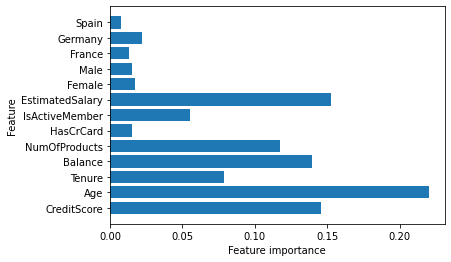

In [92]:
#features importance
#1 = perfectly predicts the target, 0 = not used at all
def plot_feature_importances(inp):
    n_features = x.shape[1]
    plt.barh(range(n_features), inp.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(model)

In [76]:
#model improvement(1)
# cross val splitting
from sklearn.model_selection import cross_val_score


In [77]:
cv = cross_val_score(model, x, y, cv=5)
cv.mean()

0.7901

In [83]:
#model improvement(2)
#tuning parameter with cross val
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[x for x in range(2, 11)], 'min_samples_leaf':[c for c in range(1, 11)]}
params2 = {'max_depth':[x for x in range(1, 11)]}
grid = GridSearchCV(model, param_grid=params2, cv = 5)
print("parameters max depth:", (params2['max_depth']))
#print("parameters min samples leaf:", (params['min_samples_leaf']))

parameters max depth: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)
grid.fit(x_train, y_train)
y_prediction = grid.predict(x_test)#for confusion metric

In [85]:
print("best parameters", grid.best_estimator_)
print("grid search cv score:", grid.score(x_test, y_test))

best parameters DecisionTreeClassifier(max_depth=6)
grid search cv score: 0.8551515151515151


In [86]:
'''# visualize tree
from sklearn import tree

plt.subplots(figsize=(37,57))
tree.plot_tree(model, fontsize=9)
plt.show()'''

'# visualize tree\nfrom sklearn import tree\n\nplt.subplots(figsize=(37,57))\ntree.plot_tree(model, fontsize=9)\nplt.show()'

In [87]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_prediction)
cf

array([[2561,   67],
       [ 411,  261]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2628
           1       0.80      0.39      0.52       672

    accuracy                           0.86      3300
   macro avg       0.83      0.68      0.72      3300
weighted avg       0.85      0.86      0.83      3300

